In [29]:
#import the libraries


import pandas as pd           
import numpy as np    
import matplotlib.pyplot as plt              
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelBinarizer 
from sklearn .impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression ,SGDRegressor                         

In [30]:
# read the data 
df=pd.read_csv("california_housing_train.csv")
print(df.head())
x=df.info()
print(x)
df.isnull().sum()
df.describe()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                  15         5612            1283   
1    -114.47     34.40                  19         7650            1901   
2    -114.56     33.69                  17          720             174   
3    -114.57     33.64                  14         1501             337   
4    -114.57     33.57                  20         1454             326   

   population  households  median_income  median_house_value  
0        1015         472         1.4936               66900  
1        1129         463         1.8200               80100  
2         333         117         1.6509               85700  
3         515         226         3.1917               73400  
4         624         262         1.9250               65500  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


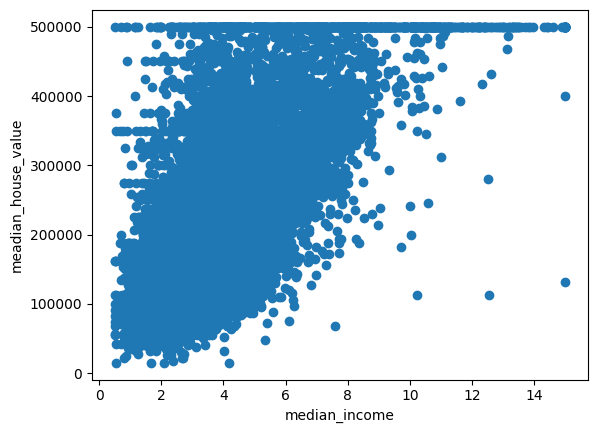

In [31]:
# exploring the data 
plt.scatter(df["median_income"],df["median_house_value"])
plt.xlabel("median_income")
plt.ylabel("meadian_house_value")
plt.show()


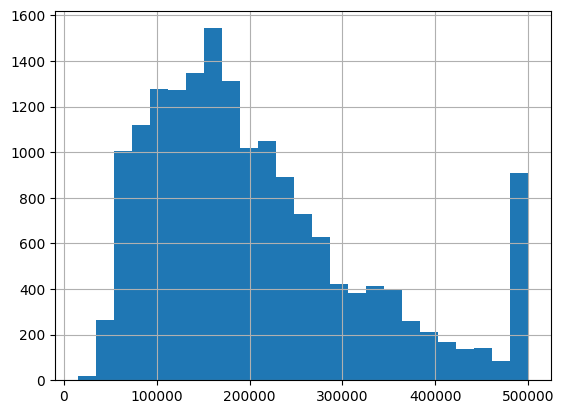

In [32]:
df["median_house_value"].hist(bins=25)
plt.show()

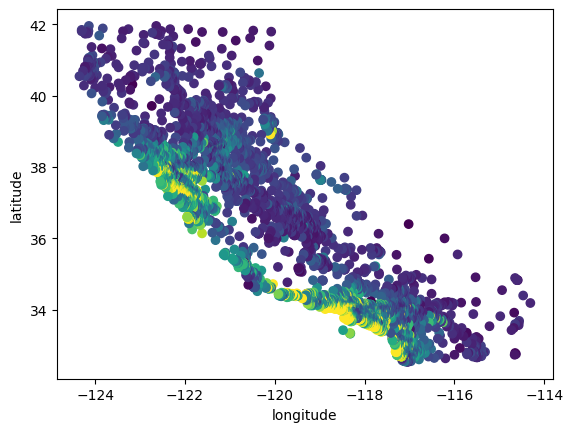

In [33]:
plt.Figure(figsize=(10,6))
plt.scatter(df["longitude"],df["latitude"],c=df["median_house_value"] )
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

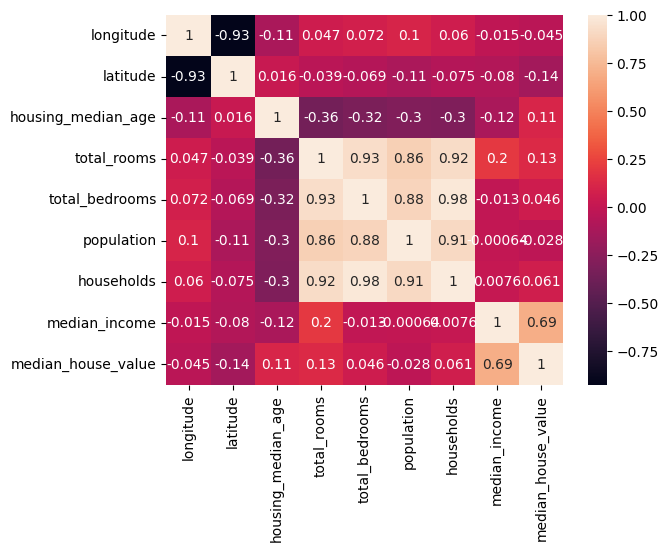

In [34]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
#feature engineering 
df["rooms_per_household"]=df['total_rooms']/df["households"]
df["bedroms_per_room"]=df["total_bedrooms"]/df["total_rooms"]
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                  15         5612            1283   
1        -114.47     34.40                  19         7650            1901   
2        -114.56     33.69                  17          720             174   
3        -114.57     33.64                  14         1501             337   
4        -114.57     33.57                  20         1454             326   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                  52         2217             394   
16996    -124.27     40.69                  36         2349             528   
16997    -124.30     41.84                  17         2677             531   
16998    -124.30     41.80                  19         2672             552   
16999    -124.35     40.54                  52         1820             300   

       population  households  median_income  media

In [36]:
### bluting the model
x=df.drop(["median_house_value"],axis=1)   #featres 
y=df["median_house_value"]  #target       
x_trian ,x_test ,y_train ,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model1=LinearRegression()
model1.fit(x_trian,y_train)
y_pred=model1.predict(x_test)
print(y_pred)

[143022.62071408 399701.64318718  80996.64614696 ... 272473.02450447
 250382.9357245  176139.80314044]


In [37]:
# error       
error=mean_absolute_error(y_test,y_pred)
print(error)

50059.04597730071
